In [1]:

#this allows relative imports in notebook
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from UCLSE.environment import Market_session, yamlLoad
import pandas as pd
from UCLSE.plotting_utilities import bid_ask_window,demand_curve_intersect, bid_ask_last_plot


%matplotlib inline

# Market_session

The Market_session class is the coordinator between traders, exchange and supply_demand modules. It sets up the experiment, runs it and records the information.

In [2]:
pa=module_path
config_name='UCLSE\\test\\fixtures\\mkt_cfg.yml'
config_path=os.path.join(pa,config_name)

environ_dic=yamlLoad(config_path)
environ_dic['trade_file']='avg_balance.csv'
environ_dic['trade_record']= 'transactions.csv'

The instantiation of the class requires multiple parameters. Most of them are recognisable from the previous tutorial on the supply_demand class. The new elements here include the buyers spec where the population of trading agents is defined.

In [3]:

environ_dic={
'start_time': 0.0,
 'end_time': 600.0, #how long the experiment goes on for
 'supply_price_low': 95,
 'supply_price_high': 95,
 'demand_price_low': 105,
 'demand_price_high': 105,
 'interval': 30,
 'timemode': 'drip-poisson',
 'buyers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10}, #how many of each type of trader we want
 'sellers_spec': {'GVWY': 10, 'SHVR': 10, 'ZIC': 10, 'ZIP': 10},
 'verbose': False,
 'trade_file': 'avg_balance.csv', #profit and loss summary by trader type
 'trade_record': 'transactions.csv', #list of all transactions
 'dump_each_trade': True} #record each trade

Define Market_session object

In [4]:
sess=Market_session(**environ_dic)

It has an associated exchange

In [5]:
sess.exchange

No orders in exchange order book

Associated traders

In [6]:
sess.traders

{'B00': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf5f8>,
 'B01': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf630>,
 'B02': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf0f0>,
 'B03': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf128>,
 'B04': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf048>,
 'B05': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf208>,
 'B06': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf2b0>,
 'B07': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf320>,
 'B08': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf358>,
 'B09': <UCLSE.traders.Trader_Giveaway at 0x1cf395bf080>,
 'B10': <UCLSE.traders.Trader_Shaver at 0x1cf394f8898>,
 'B11': <UCLSE.traders.Trader_Shaver at 0x1cf3c1bf2b0>,
 'B12': <UCLSE.traders.Trader_Shaver at 0x1cf3c1bf278>,
 'B13': <UCLSE.traders.Trader_Shaver at 0x1cf3c1bf208>,
 'B14': <UCLSE.traders.Trader_Shaver at 0x1cf3c1bf390>,
 'B15': <UCLSE.traders.Trader_Shaver at 0x1cf3c1bf2e8>,
 'B16': <UCLSE.traders.Trader_Shaver at 0x1cf3c1bf3c8>,
 'B17': <UCLSE.traders.Trade

and associated supply and demand

In [7]:
sess.sd

The principle method is simulate() which runs the experiment and will save the profit and loss of the traders in a csv as well as the transaction record.

In [8]:
sess.simulate(sess.trade_stats_df3,recording=True)

avg_balance.csv


All transactions are stored at the exchange. Cancels occur when traders are issued more orders than their limit (default 1); the old one is cancelled and replaced by the new one.

In [9]:
df=pd.DataFrame(sess.exchange.tape)
df

,order,p1_qid,p2_qid,party1,party2,price,qty,time,type
0,NaN,7.0,8.0,S19,B01,95.0,1.0,3.5250,Trade
1,NaN,6.0,9.0,S13,B04,96.0,1.0,3.8000,Trade
2,NaN,10.0,15.0,S08,B05,95.0,1.0,4.7625,Trade
3,NaN,22.0,25.0,S10,B00,95.0,1.0,6.7875,Trade
4,NaN,33.0,35.0,B13,S20,105.0,1.0,8.4250,Trade
5,NaN,37.0,38.0,B02,S27,105.0,1.0,8.8000,Trade
6,NaN,39.0,42.0,B23,S26,97.0,1.0,9.2000,Trade
7,NaN,43.0,44.0,B35,S22,99.0,1.0,9.5125,Trade
8,NaN,52.0,58.0,B15,S25,106.0,1.0,11.9500,Trade
9,NaN,61.0,65.0,B07,S36,106.0,1.0,12.4750,Trade


The state of the orderbook at the end of the period is:

In [10]:
print(sess.exchange)

                               tid     
otype                          Ask  Bid
price time     qid  oid   qty          
89.0  599.6625 9106 -1542 1    NaN  B20
90.0  598.7625 9085 -1544 1    NaN  B22
99.0  599.6000 9105 -1543 1    NaN  B21
105.0 598.4125 9077 -1554 1    NaN  B32
      599.3500 9098 -1557 1    NaN  B35
106.0 598.5500 9080 -1553 1    NaN  B31
107.0 599.8625 9111 -1559 1    NaN  B37
      599.9500 9114 -1560 1    NaN  B38
108.0 599.6750 9107 -1555 1    NaN  B33
111.0 598.3875 9076 -1539 1    NaN  B17
112.0 598.4375 9078 -1540 1    NaN  B18
118.0 599.5500 9104 -1594 1    S32  NaN
125.0 598.9875 9091 -1574 1    S12  NaN
126.0 598.4750 9079 -1582 1    S20  NaN
129.0 599.9625 9115 -1565 1    S03  NaN
134.0 597.5375 9057 -1579 1    S17  NaN
      598.6375 9083 -1568 1    S06  NaN
139.0 598.9000 9089 -1601 1    S39  NaN
142.0 599.4000 9100 -1590 1    S28  NaN
147.0 599.9250 9113 -1571 1    S09  NaN
152.0 599.9750 9116 -1600 1    S38  NaN
168.0 599.2250 9096 -1503 1    S21  NaN


The recording=True flag records enough information from the experiment for it to be replayed exactly. When replaying all non-deterministic results are bypassed and replaced with their outputs from the first running of the experiment.  Originally this was to allow side by side testing when refactoring the code.

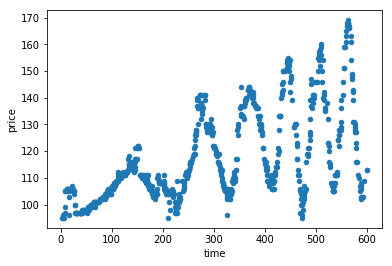

In [11]:
df[['time','price']].plot(x='time',y='price',kind='scatter')

We can look at the list of orders sent to the traders through this method

In [12]:
df=sess.create_order_list(sess)
df.tail()

,tid,otype,price,qty,time,qid,oid,time_issued
time,,,,,,,,
1970-01-01 00:09:58.457786885,S09,Ask,147.0,1,598.457787,None,-1571,598.4625
1970-01-01 00:09:58.949590164,B11,Bid,159.0,1,598.949590,None,-1533,598.9500
1970-01-01 00:09:59.441393443,B00,Bid,162.0,1,599.441393,None,-1522,599.4500
1970-01-01 00:09:59.441393443,B29,Bid,162.0,1,599.441393,None,-1551,599.4500
1970-01-01 00:09:59.441393443,S38,Ask,152.0,1,599.441393,None,-1600,599.4500


We really want to know a bit more about these orders - when were they cancelled or completed if at all? We can get a fuller picture by examining the records of the individual traders. This method does not require the session to be recorded.

In [13]:
order_list=sess.make_order_list(sess)
order_list

,tid,otype,price,qty,qid,oid,status,completion_time
issue_time,,,,,,,,
1970-01-01 00:00:00.012500000,B13,Bid,105.0,1,NaN,-15,complete,1970-01-01 00:00:08.425000000
1970-01-01 00:00:00.600735294,S19,Ask,95.0,1,NaN,-61,complete,1970-01-01 00:00:03.525000000
1970-01-01 00:00:01.188970588,S13,Ask,95.0,1,NaN,-55,complete,1970-01-01 00:00:03.800000000
1970-01-01 00:00:01.777205882,S10,Ask,95.0,1,NaN,-52,complete,1970-01-01 00:00:06.787500000
1970-01-01 00:00:01.917261905,B35,Bid,105.0,1,NaN,-37,complete,1970-01-01 00:00:09.512499999
1970-01-01 00:00:02.393452381,B04,Bid,105.0,1,NaN,-6,complete,1970-01-01 00:00:03.800000000
1970-01-01 00:00:02.869642857,B01,Bid,105.0,1,NaN,-3,complete,1970-01-01 00:00:03.525000000
1970-01-01 00:00:02.953676471,S25,Ask,95.0,1,NaN,-67,complete,1970-01-01 00:00:11.950000000
1970-01-01 00:00:03.541911765,S08,Ask,95.0,1,NaN,-50,complete,1970-01-01 00:00:04.762500000


We can create supply and demand curves from the orders issued to traders as before, calculate their intersect and plot them. 

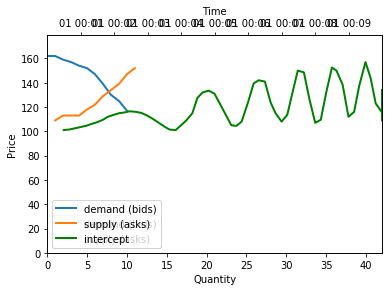

In [19]:
bids,asks,intersect=bid_ask_window(sess.sd,df,periods=30/sess.timer.step,step=10)
demand_curve_intersect(bids,asks,intersect,df,path='basic_animation.mp4',window='30s')

We can also use the replay vars to plot how the best bid ask evolved and where transactions were relative to the supply demand curve.

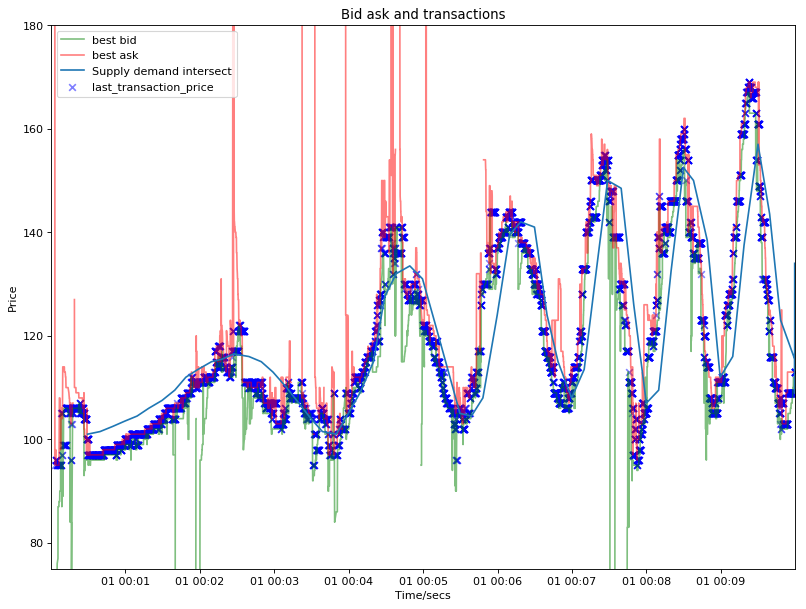

In [18]:
best_bid,best_ask,last_trans=sess.best_last(sess)
bid_ask_last_plot(best_bid,best_ask,last_trans,intersect)